<font size="7"> **Group Data Challenge - Migros**</font>

# Import modules

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Import dataset from UrbanDataLabs

In [99]:
ds_udl = pd.read_csv("../data/GeoFeatures_Zurich_provided_by_UrbanDataLabs.csv")

# Dataset description
- x, y: Coordinates in EPSG 2056
- lat, lng: Coordinates in latitude, longitude
- hh_ha, pers_ha: Density of households and persons per hectare
- pt_class: Public transport quality class according to Federal Office for Spatial Development (numerical discrete values: 1 to 4)
- pt_dis: Distance to next stop (as the crow flies, https://www.are.admin.ch/dam/are/de/dokumente/verkehr/oev-gueteklassen-berechnungsmethodikare.pdf.download.pdf/oev-gueteklassen-berechnungsmethodikare.pdf)
- station_dis: Distance to railway station
- noise_street: Road noise according to BAFU
- bldg_foot: Building footprint in m²
- bldg_corner: Building is located at an intersection
- bldg_500: Number of buildings in 500m radius
- net_acc: Size of catchment area in 2 min driving time (https://en.wikipedia.org/wiki/Catchment_area)

In [100]:
ds_udl

x          y  \
0       2682762.5  1246387.5   
1       2682762.5  1246412.5   
2       2682787.5  1246337.5   
3       2682787.5  1246362.5   
4       2682787.5  1246387.5   
...           ...        ...   
126326  2682737.5  1246362.5   
126327  2682737.5  1246387.5   
126328  2682737.5  1246412.5   
126329  2682762.5  1246337.5   
126330  2682762.5  1246362.5   

                                                     geom  hh_ha  pers_ha  \
0       01010000200808000000000040C577444100000080B304...      8       10   
1       01010000200808000000000040C577444100000080CC04...     53      100   
2       010100002008080000000000C0D1774441000000808104...      8       10   
3       010100002008080000000000C0D1774441000000809A04...      8       10   
4       010100002008080000000000C0D177444100000080B304...      8       10   
...                                                   ...    ...      ...   
126326  010100002008080000000000C0B8774441000000809A04...      8       10   
126327  010100002008080000000000C0B877444100000080B304...      8       10   
126328  010100002008080000000000C0B877444100000080CC04...     53      100   
126329  01010000200808000000000040C5774441000000808104...      8       10   
126330  01010000200808000000000040C5774441000000809A04...      8       10   

        pt_class  pt_dis  station_dis  noise_street  bldg_foot bldg_corner  \
0            1.0      55         1725            45       4204           t   
1            1.0      50         1700            69       4204           t   
2            1.0      75         1770            58       4204           t   
3            1.0      55         1745            56       4204           t   
4            1.0      35         1720            63       4204           t   
...          ...     ...          ...           ...        ...         ...   
126326       1.0      90         1755            67       4204           t   
126327       1.0      75         1730            65       4204           t   
126328       1.0      75         1710            69       4204           t   
126329       1.0      90         1775            59       4204           t   
126330       1.0      70         1750            45       4204           t   

        bldg_500    net_acc      lat      lng  
0        1402050  1043508.0  47.3631  8.53425  
1        1402050  1043508.0  47.3634  8.53425  
2        1402050  1043508.0  47.3627  8.53457  
3        1402050  1043508.0  47.3629  8.53457  
4        1402050  1043508.0  47.3631  8.53458  
...          ...        ...      ...      ...  
126326   1402050  1043508.0  47.3629  8.53391  
126327   1402050  1043508.0  47.3631  8.53392  
126328   1402050  1043508.0  47.3634  8.53392  
126329   1402050  1043508.0  47.3627  8.53424  
126330   1402050  1043508.0  47.3629  8.53424  

[126331 rows x 15 columns]

# Initial Data Exploration

In [101]:
ds_udl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126331 entries, 0 to 126330
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   x             126331 non-null  float64
 1   y             126331 non-null  float64
 2   geom          126331 non-null  object 
 3   hh_ha         126331 non-null  int64  
 4   pers_ha       126331 non-null  int64  
 5   pt_class      122870 non-null  float64
 6   pt_dis        126331 non-null  int64  
 7   station_dis   126331 non-null  int64  
 8   noise_street  126331 non-null  int64  
 9   bldg_foot     126331 non-null  int64  
 10  bldg_corner   126331 non-null  object 
 11  bldg_500      126331 non-null  int64  
 12  net_acc       123468 non-null  float64
 13  lat           126331 non-null  float64
 14  lng           126331 non-null  float64
dtypes: float64(6), int64(7), object(2)
memory usage: 14.5+ MB


- <font size="5">**Testing for NaN values**</font>

In [102]:
ds_udl.isnull().values.any()

True

In [103]:
ds_udl.isnull().sum()

x                  0
y                  0
geom               0
hh_ha              0
pers_ha            0
pt_class        3461
pt_dis             0
station_dis        0
noise_street       0
bldg_foot          0
bldg_corner        0
bldg_500           0
net_acc         2863
lat                0
lng                0
dtype: int64

In [104]:
ds_udl[ds_udl.isna().any(axis=1)]

x          y  \
270     2676237.5  1252487.5   
271     2676262.5  1252412.5   
272     2676262.5  1252437.5   
273     2676262.5  1252462.5   
274     2676262.5  1252487.5   
...           ...        ...   
125711  2678012.5  1247262.5   
125712  2678012.5  1247287.5   
125713  2678037.5  1247187.5   
125714  2678037.5  1247212.5   
125715  2678037.5  1247237.5   

                                                     geom  hh_ha  pers_ha  \
270     010100002008080000000000C0066B444100000080871C...      0        0   
271     01010000200808000000000040136B4441000000803C1C...      0        0   
272     01010000200808000000000040136B444100000080551C...      0        0   
273     01010000200808000000000040136B4441000000806E1C...      0        0   
274     01010000200808000000000040136B444100000080871C...      0        0   
...                                                   ...    ...      ...   
125711  010100002008080000000000407E6E4441000000801E08...      0        0   
125712  010100002008080000000000407E6E4441000000803708...      0        0   
125713  010100002008080000000000C08A6E444100000080D307...      0        0   
125714  010100002008080000000000C08A6E444100000080EC07...      0        0   
125715  010100002008080000000000C08A6E4441000000800508...      0        0   

        pt_class  pt_dis  station_dis  noise_street  bldg_foot bldg_corner  \
270          NaN     475         8235            52         92           f   
271          NaN     430         8175            52         92           f   
272          NaN     450         8190            52         92           f   
273          NaN     470         8200            54         92           f   
274          NaN     490         8215            49         92           f   
...          ...     ...          ...           ...        ...         ...   
125711       4.0     705         5235            74        142           f   
125712       4.0     720         5230            64        142           f   
125713       4.0     690         5220            76        142           f   
125714       4.0     700         5215            70        142           f   
125715       4.0     715         5215            67        142           f   

        bldg_500  net_acc      lat      lng  
270       132755    682.0  47.4188  8.44892  
271       132755    682.0  47.4181  8.44924  
272       132755    682.0  47.4183  8.44924  
273       132755    682.0  47.4186  8.44925  
274       132755    682.0  47.4188  8.44925  
...          ...      ...      ...      ...  
125711       960      NaN  47.3716  8.47153  
125712       960      NaN  47.3718  8.47153  
125713       960      NaN  47.3709  8.47184  
125714       960      NaN  47.3711  8.47185  
125715       960      NaN  47.3714  8.47185  

[5939 rows x 15 columns]

- <font size="5">**Check for duplicates**</font>

In [105]:
print(ds_udl.duplicated().sum())

0


- <font size="5">**Cleaning the dataset**</font>

In [106]:
ds_udl_clean = ds_udl.dropna()
ds_udl_clean

x          y  \
0       2682762.5  1246387.5   
1       2682762.5  1246412.5   
2       2682787.5  1246337.5   
3       2682787.5  1246362.5   
4       2682787.5  1246387.5   
...           ...        ...   
126326  2682737.5  1246362.5   
126327  2682737.5  1246387.5   
126328  2682737.5  1246412.5   
126329  2682762.5  1246337.5   
126330  2682762.5  1246362.5   

                                                     geom  hh_ha  pers_ha  \
0       01010000200808000000000040C577444100000080B304...      8       10   
1       01010000200808000000000040C577444100000080CC04...     53      100   
2       010100002008080000000000C0D1774441000000808104...      8       10   
3       010100002008080000000000C0D1774441000000809A04...      8       10   
4       010100002008080000000000C0D177444100000080B304...      8       10   
...                                                   ...    ...      ...   
126326  010100002008080000000000C0B8774441000000809A04...      8       10   
126327  010100002008080000000000C0B877444100000080B304...      8       10   
126328  010100002008080000000000C0B877444100000080CC04...     53      100   
126329  01010000200808000000000040C5774441000000808104...      8       10   
126330  01010000200808000000000040C5774441000000809A04...      8       10   

        pt_class  pt_dis  station_dis  noise_street  bldg_foot bldg_corner  \
0            1.0      55         1725            45       4204           t   
1            1.0      50         1700            69       4204           t   
2            1.0      75         1770            58       4204           t   
3            1.0      55         1745            56       4204           t   
4            1.0      35         1720            63       4204           t   
...          ...     ...          ...           ...        ...         ...   
126326       1.0      90         1755            67       4204           t   
126327       1.0      75         1730            65       4204           t   
126328       1.0      75         1710            69       4204           t   
126329       1.0      90         1775            59       4204           t   
126330       1.0      70         1750            45       4204           t   

        bldg_500    net_acc      lat      lng  
0        1402050  1043508.0  47.3631  8.53425  
1        1402050  1043508.0  47.3634  8.53425  
2        1402050  1043508.0  47.3627  8.53457  
3        1402050  1043508.0  47.3629  8.53457  
4        1402050  1043508.0  47.3631  8.53458  
...          ...        ...      ...      ...  
126326   1402050  1043508.0  47.3629  8.53391  
126327   1402050  1043508.0  47.3631  8.53392  
126328   1402050  1043508.0  47.3634  8.53392  
126329   1402050  1043508.0  47.3627  8.53424  
126330   1402050  1043508.0  47.3629  8.53424  

[120392 rows x 15 columns]

 - <font size="5">**Some basic statistics**</font>

In [107]:
ds_udl_clean.describe().transpose()

count          mean            std           min  \
x             120392.0  2.681862e+06    3609.551948  2.674688e+06   
y             120392.0  1.249883e+06    2231.453564  1.245862e+06   
hh_ha         120392.0  2.648015e+01      33.615073  0.000000e+00   
pers_ha       120392.0  5.467792e+01      66.592057  0.000000e+00   
pt_class      120392.0  1.995814e+00       0.995542  1.000000e+00   
pt_dis        120392.0  1.965052e+02     129.531961  0.000000e+00   
station_dis   120392.0  4.072582e+03    2012.100780  5.500000e+01   
noise_street  120392.0  5.415666e+01      10.917718  0.000000e+00   
bldg_foot     120392.0  1.637922e+03    3630.872945  2.300000e+01   
bldg_500      120392.0  7.159643e+05  596532.363126  2.194000e+03   
net_acc       120392.0  7.309788e+05  376249.419563  1.810000e+02   
lat           120392.0  4.739468e+01       0.020050  4.735770e+01   
lng           120392.0  8.522965e+00       0.047830  8.427360e+00   

                       25%           50%           75%           max  
x             2.679088e+06  2.682088e+06  2.684638e+06  2.688488e+06  
y             1.247988e+06  1.250062e+06  1.251712e+06  1.253988e+06  
hh_ha         0.000000e+00  1.300000e+01  4.300000e+01  2.550000e+02  
pers_ha       0.000000e+00  3.000000e+01  9.000000e+01  5.460000e+02  
pt_class      1.000000e+00  2.000000e+00  3.000000e+00  4.000000e+00  
pt_dis        1.100000e+02  1.750000e+02  2.500000e+02  1.290000e+03  
station_dis   2.580000e+03  3.905000e+03  5.220000e+03  9.680000e+03  
noise_street  4.700000e+01  5.300000e+01  6.100000e+01  9.700000e+01  
bldg_foot     2.300000e+02  4.780000e+02  1.245000e+03  3.390600e+04  
bldg_500      2.832020e+05  5.230855e+05  9.981210e+05  3.350409e+06  
net_acc       4.316590e+05  7.274070e+05  1.036669e+06  1.657424e+06  
lat           4.737770e+01  4.739640e+01  4.741100e+01  4.743220e+01  
lng           8.486080e+00  8.525700e+00  8.559840e+00  8.611450e+00


---
<font size="4">

1. Mean density of households = 26.48 
2. Mean number of persons per hectare = 54.7
3. The centroid of all locations is represented by the following coordinates: https://goo.gl/maps/t6rc8zacUes9sGkS9
4. The column "bldg_500" has extreme values which could be seen as unplausible at first glance
---
</font>

- <font size="5">**Boxplots**</font>

Text(0.5, 0, 'Buildings in 500 meter radius')

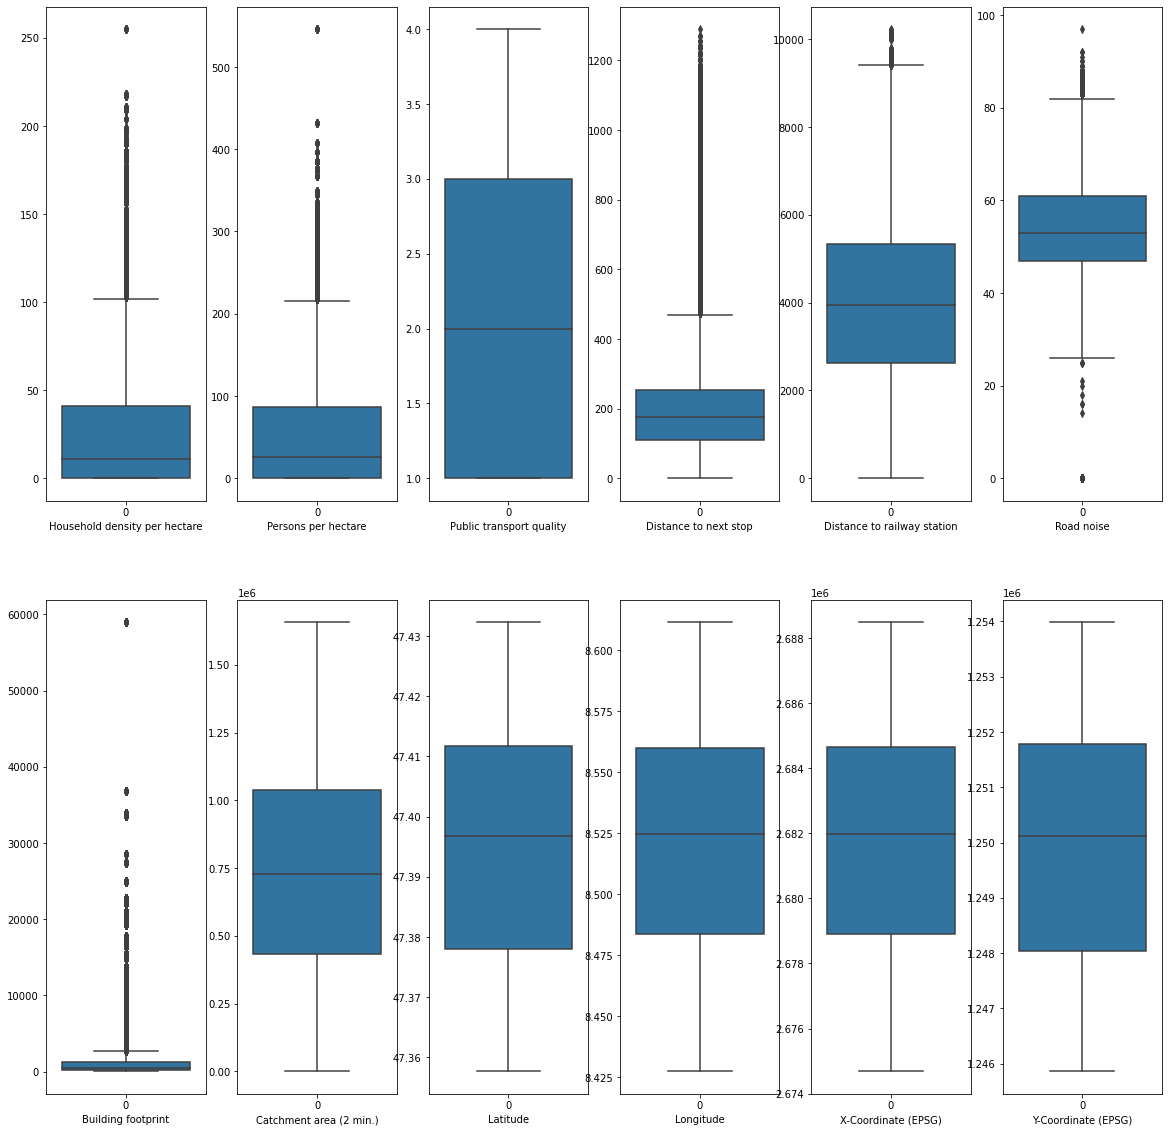

<Figure size 360x360 with 0 Axes>

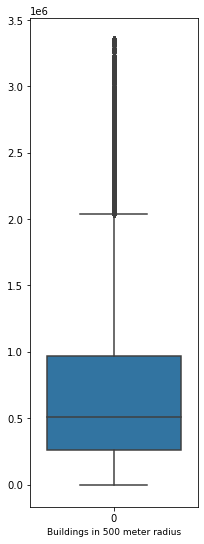

In [108]:
fig, ax = plt.subplots(2, 6, figsize=(20,20))
plt.figure(figsize=(5,5))
sns.boxplot(data=ds_udl['hh_ha'],  orient='v' , ax=ax[0,0])
#ax[0, 0].boxplot(ds_udl['hh_ha'])
ax[0, 0].set_xlabel("Household density per hectare")

sns.boxplot(data=ds_udl['pers_ha'],  orient='v' , ax=ax[0,1])
#ax[0, 1].boxplot(ds_udl['pers_ha'])
ax[0, 1].set_xlabel("Persons per hectare")

sns.boxplot(data=ds_udl_clean['pt_class'],  orient='v' , ax=ax[0,2])
#ax[0, 2].boxplot(ds_udl_clean['pt_class'])
ax[0, 2].set_xlabel("Public transport quality")

sns.boxplot(data=ds_udl['pt_dis'],  orient='v' , ax=ax[0,3])
#ax[0, 3].boxplot(ds_udl['pt_dis'])
ax[0, 3].set_xlabel("Distance to next stop")

sns.boxplot(data=ds_udl['station_dis'],  orient='v' , ax=ax[0,4])
#ax[0, 4].boxplot(ds_udl['station_dis'])
ax[0, 4].set_xlabel("Distance to railway station")

sns.boxplot(data=ds_udl['noise_street'],  orient='v' , ax=ax[0,5])
#ax[0, 5].boxplot(ds_udl['noise_street'])
ax[0, 5].set_xlabel("Road noise")

sns.boxplot(data=ds_udl['bldg_foot'],  orient='v' , ax=ax[1,0])
#ax[1, 0].boxplot(ds_udl['bldg_foot'])
ax[1, 0].set_xlabel("Building footprint")

sns.boxplot(data=ds_udl_clean['net_acc'],  orient='v' , ax=ax[1,1])
#ax[1, 1].boxplot(ds_udl_clean['net_acc'])
ax[1, 1].set_xlabel("Catchment area (2 min.)")

sns.boxplot(data=ds_udl['lat'],  orient='v' , ax=ax[1,2])
#ax[1, 2].boxplot(ds_udl['lat'])
ax[1, 2].set_xlabel("Latitude")

sns.boxplot(data=ds_udl['lng'],  orient='v' , ax=ax[1,3])
#ax[1, 3].boxplot(ds_udl['lng'])
ax[1, 3].set_xlabel("Longitude")

sns.boxplot(data=ds_udl['x'],  orient='v' , ax=ax[1,4])
#ax[1, 4].boxplot(ds_udl['x'])
ax[1, 4].set_xlabel("X-Coordinate (EPSG)")

sns.boxplot(data=ds_udl['y'],  orient='v' , ax=ax[1,5])
#ax[1, 5].boxplot(ds_udl['y'])
ax[1, 5].set_xlabel("Y-Coordinate (EPSG)")

fig, ax = plt.subplots(figsize=(3,9))
#seaborn.violinplot(ax=ax, data=df, **violin_options)
#boxplot(ds_udl['bldg_500'])
sns.boxplot(data=ds_udl['bldg_500'],  orient='v')
#box_bldg500 = ds_udl.boxplot(column=['bldg_500'], grid=False)
ax.set_xlabel("Buildings in 500 meter radius", size=9)

- <font size="5">**Histograms**</font>

Text(0.5, 0, 'Y-Coordinate (EPSG)')

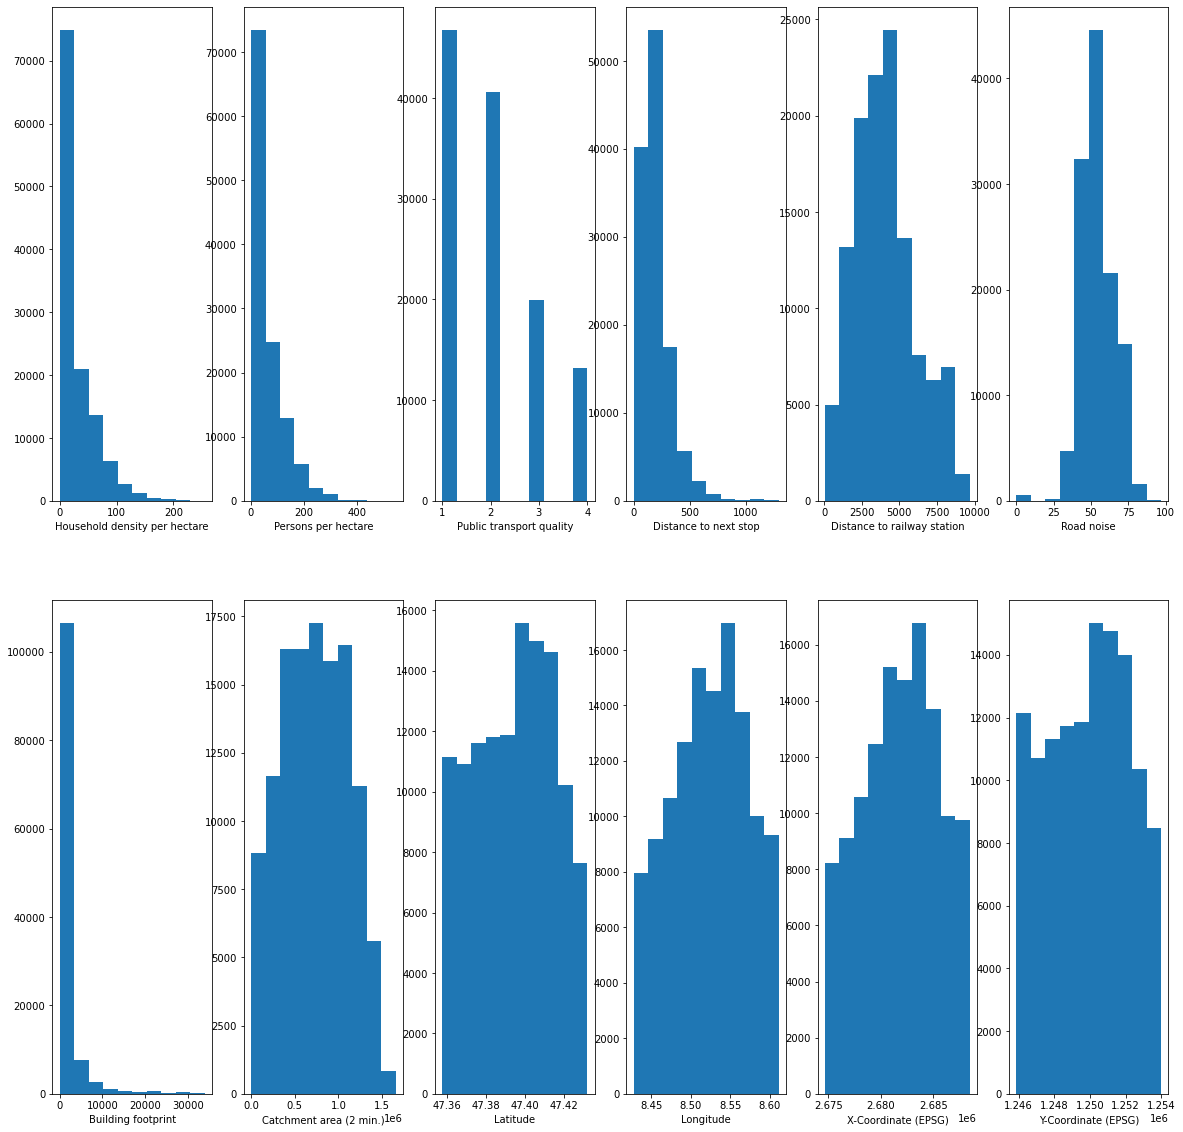

<Figure size 360x360 with 0 Axes>

In [109]:
fig, ax = plt.subplots(2, 6, figsize=(20,20))
plt.figure(figsize=(5,5))
ax[0,0].hist(x=ds_udl_clean['hh_ha'])
ax[0,0].set_xlabel("Household density per hectare")

ax[0,1].hist(x=ds_udl_clean['pers_ha'])
ax[0,1].set_xlabel("Persons per hectare")

ax[0,2].hist(x=ds_udl_clean['pt_class'])
ax[0,2].set_xlabel("Public transport quality")

ax[0,3].hist(x=ds_udl_clean['pt_dis'])
ax[0,3].set_xlabel("Distance to next stop")

ax[0,4].hist(x=ds_udl_clean['station_dis'])
ax[0,4].set_xlabel("Distance to railway station")

ax[0,5].hist(x=ds_udl_clean['noise_street'])
ax[0,5].set_xlabel("Road noise")

ax[1,0].hist(x=ds_udl_clean['bldg_foot'])
ax[1,0].set_xlabel("Building footprint")

ax[1,1].hist(x=ds_udl_clean['net_acc'])
ax[1,1].set_xlabel("Catchment area (2 min.)")

ax[1,2].hist(x=ds_udl_clean['lat'])
ax[1,2].set_xlabel("Latitude")

ax[1,3].hist(x=ds_udl_clean['lng'])
ax[1,3].set_xlabel("Longitude")

ax[1,4].hist(x=ds_udl_clean['x'])
ax[1,4].set_xlabel("X-Coordinate (EPSG)")

ax[1,5].hist(x=ds_udl_clean['y'])
ax[1,5].set_xlabel("Y-Coordinate (EPSG)")

- <font size="5">**Correlation Matrix**</font>

In [110]:
corrMatrix = ds_udl.drop(['geom'], axis=1).corr()

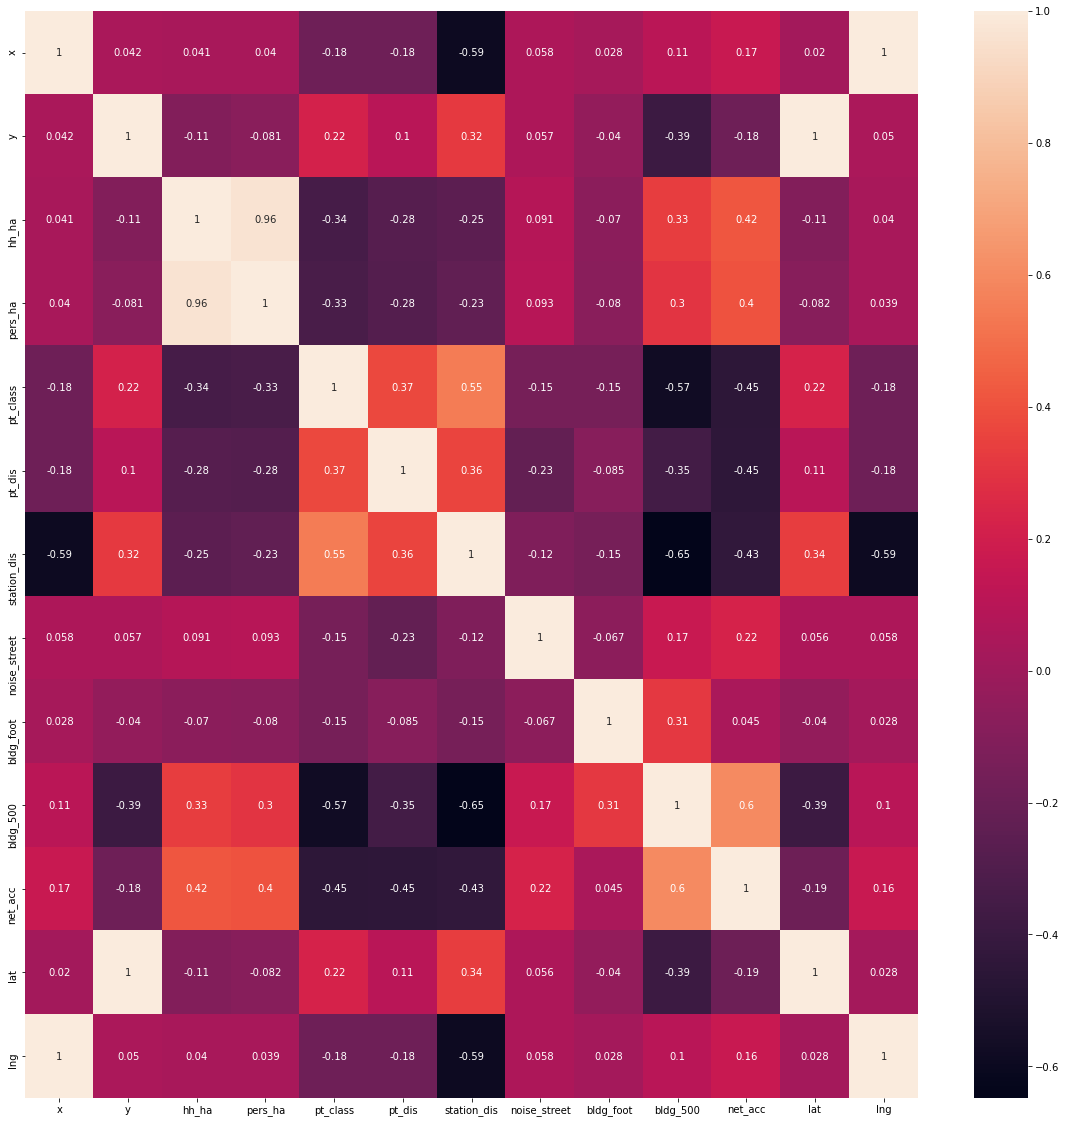

In [111]:
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [112]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
corrMatrixupper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))  
# Convert to 1-D series and drop Null values
corrPairs = corrMatrixupper.unstack().dropna()
# Sort correlation pairs
corrMatrixsort = corrPairs.sort_values()
dfcorrPairs = pd.DataFrame(corrMatrixsort).reset_index()
dfcorrPairs.columns = ['P1-1', 'P1-2', 'correlation']

In [113]:
print("Correlation >= 0.5")
dfcorrPairs[dfcorrPairs['correlation'] >= 0.5]

Correlation >= 0.5


P1-1      P1-2  correlation
73  station_dis  pt_class     0.546174
74      net_acc  bldg_500     0.599545
75      pers_ha     hh_ha     0.961563
76          lat         y     0.999747
77          lng         x     0.999964

In [114]:
print("Correlation <= -0.5")
dfcorrPairs[dfcorrPairs['correlation'] <= -0.5]

Correlation <= -0.5


P1-1         P1-2  correlation
0     bldg_500  station_dis    -0.647647
1  station_dis            x    -0.592785
2          lng  station_dis    -0.589818
3     bldg_500     pt_class    -0.571832

- <font size="5">**Correlation Plots**</font>

<ipython-input-115-849bf6f167b7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_udl_clean['pt_class'] = ds_udl_clean['pt_class'].astype('category')
C:\Users\eduar\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\eduar\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
126326    1.0
126327    1.0
126328    1.0
126329    1.0
126330    1.0
Name: pt_class, Length: 120392, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]


Text(0, 0.5, 'Buildings in 500 m radius')

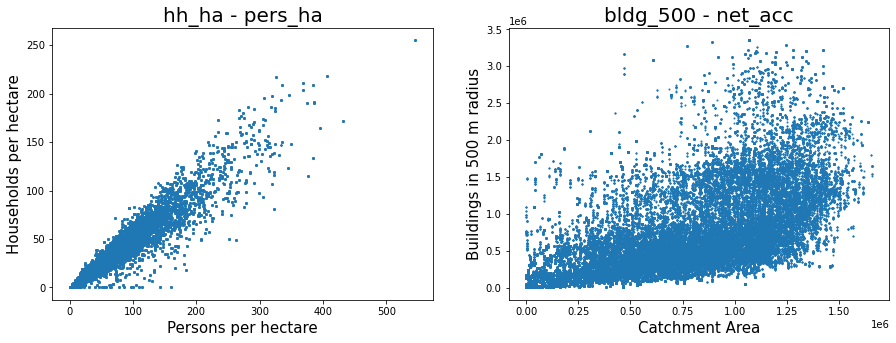

<Figure size 360x360 with 0 Axes>

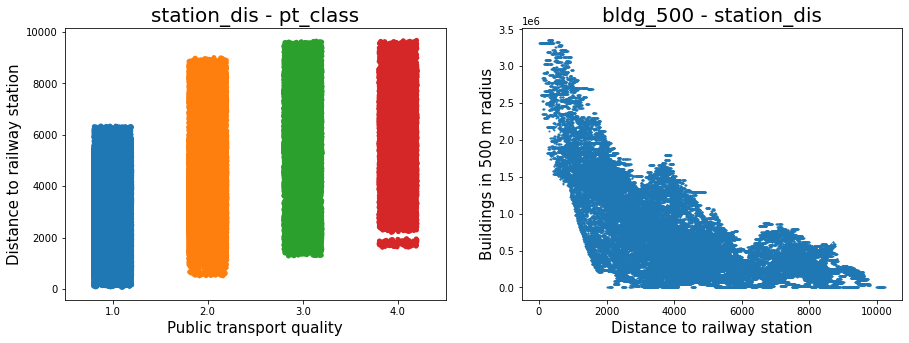

<Figure size 360x360 with 0 Axes>

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.figure(figsize=(5,5))
#sns.boxplot(data=ds_udl['hh_ha'],  orient='v' , ax=ax[0,0])
ax[0].scatter(ds_udl['pers_ha'], ds_udl['hh_ha'], s=1)
ax[0].set_title("hh_ha - pers_ha", size = 20)
ax[0].set_xlabel("Persons per hectare", size = 15)
ax[0].set_ylabel("Households per hectare", size = 15)

ax[1].scatter(ds_udl['net_acc'], ds_udl['bldg_500'], s=1)
ax[1].set_title("bldg_500 - net_acc", size = 20)
ax[1].set_xlabel("Catchment Area", size = 15)
ax[1].set_ylabel("Buildings in 500 m radius", size = 15)

fig2, ax2 = plt.subplots(1, 2, figsize=(15,5))
plt.figure(figsize=(5,5))
#sns.boxplot(data=ds_udl['hh_ha'],  orient='v' , ax=ax[0,0])
ds_udl_clean['pt_class'] = ds_udl_clean['pt_class'].astype('category')
print(ds_udl_clean['pt_class'])

#ax2[0].scatter(ds_udl_clean['pt_class'], ds_udl_clean['station_dis'])
sns.stripplot(x=ds_udl_clean['pt_class'], y=ds_udl_clean['station_dis'], data=ds_udl_clean,ax=ax2[0], jitter=0.2)
ax2[0].set_title("station_dis - pt_class", size = 20)
ax2[0].set_xlabel("Public transport quality", size = 15)
ax2[0].set_ylabel("Distance to railway station", size = 15)

ax2[1].scatter(ds_udl['station_dis'], ds_udl['bldg_500'], s=1)
ax2[1].set_title("bldg_500 - station_dis", size = 20)
ax2[1].set_xlabel("Distance to railway station", size = 15)
ax2[1].set_ylabel("Buildings in 500 m radius", size = 15)

 - <font size="5">**Location of coordinates in dataset**</font>

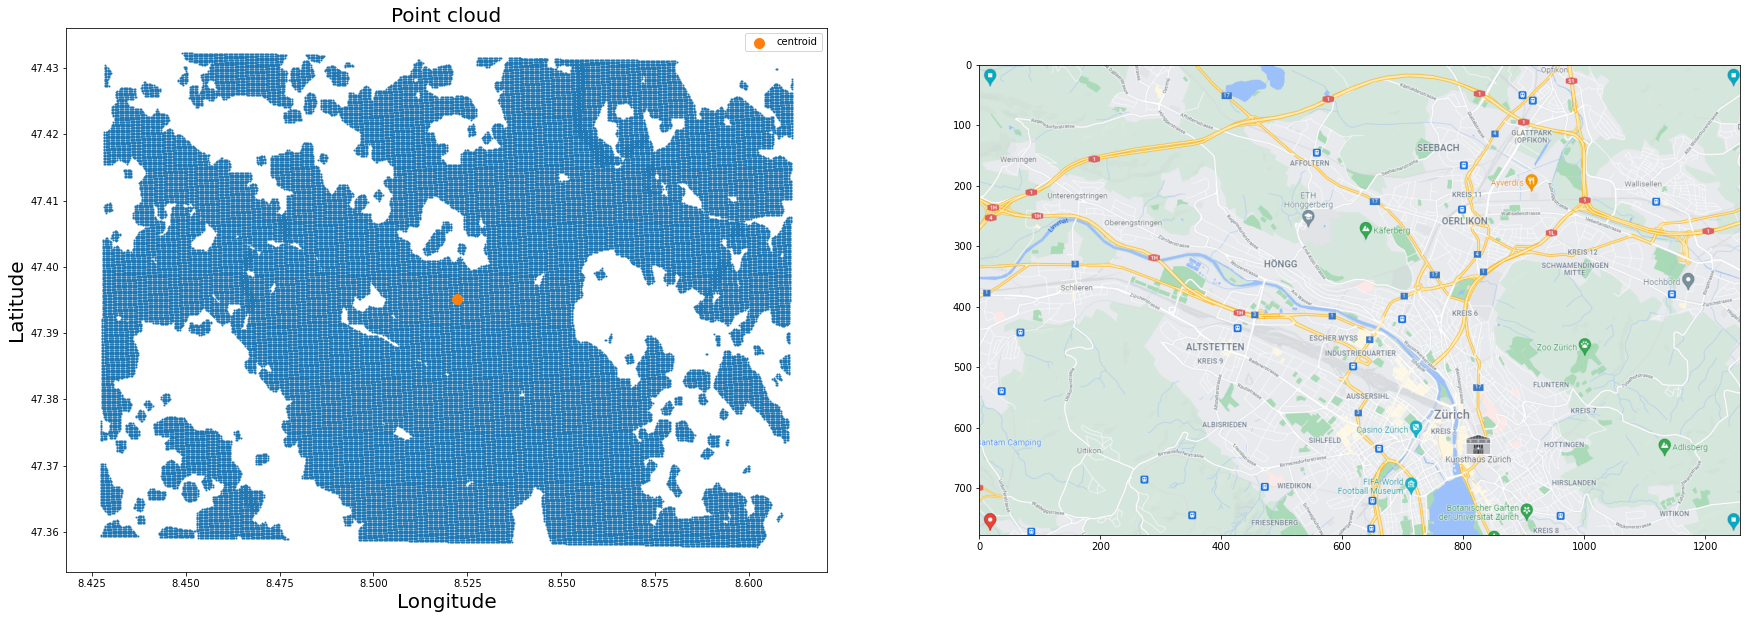

<Figure size 72x72 with 0 Axes>

In [116]:
mean_lat = ds_udl.describe().transpose().iloc[11,1]
mean_lng = ds_udl.describe().transpose().iloc[12,1]
# Calculating bounding box vallues
max_lat = ds_udl['lat'].max()
min_lat = ds_udl['lat'].min()
#print(max_lat)
#print(min_lat)
max_lng = ds_udl['lng'].max()
min_lng = ds_udl['lng'].min()
#print(max_lng)
#print(min_lng)

im = plt.imread("../data/GoogleMapsBoundingBox2raw_new.png")
fig, ax = plt.subplots(1, 2, figsize=(30,10))
plt.figure(figsize=(1,1))
ax[0].scatter(ds_udl['lng'], ds_udl['lat'], s=1)
ax[0].scatter(mean_lng, mean_lat, s=100, label='centroid')
ax[0].legend()
ax[0].set_title('Point cloud', size=20)
ax[0].set_xlabel('Longitude', fontsize = 20)
ax[0].set_ylabel('Latitude', fontsize = 20)
ax[1].imshow(im)
plt.show()

> <font size="4">As we can see from the plot the locations contained in the UDL dataset match the urban area shown in the same region in Google Maps.</font>

- <font size="5">**Spatial distribution of persons per hectare**</font>

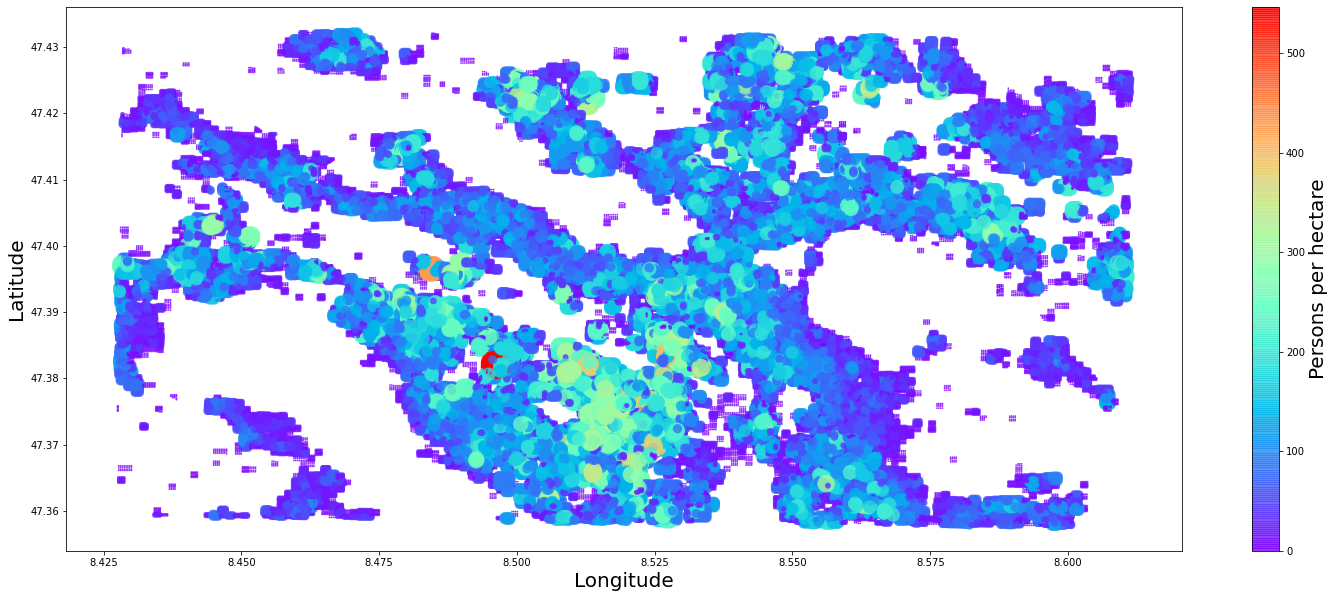

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im1 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=ds_udl['pers_ha'], c=ds_udl['pers_ha'], cmap='rainbow')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im1, ax=ax)
cbar.set_label('Persons per hectare', size=20)


- <font size="5">**Spatial distribution of housholds per hectare**</font>

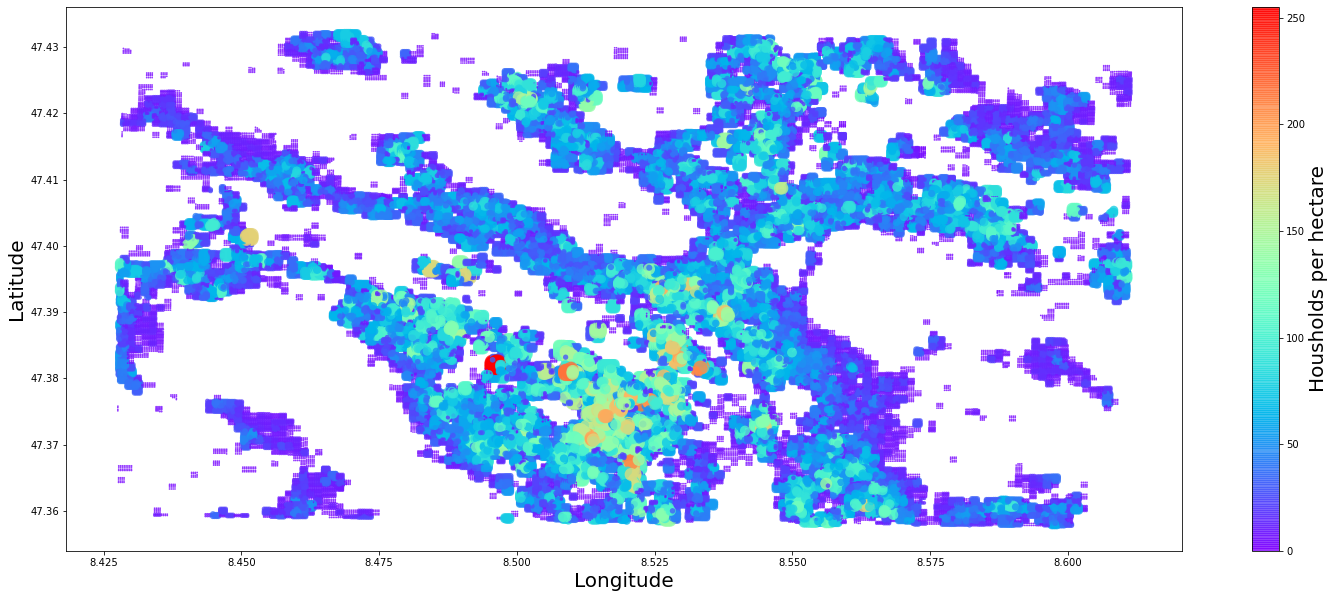

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))

im2 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=ds_udl['hh_ha'], c=ds_udl['hh_ha'], cmap='rainbow')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im2, ax=ax)
cbar.set_label('Housholds per hectare', size=20)

> <font size="4">The variables "Housholds per hectare" and "Persons per hectare" have a high correlation which reflects in the similarity of both scatter plots.</font>

- <font size="5">**Spatial distribution of the number of buildings in a 500 meter radius**</font>

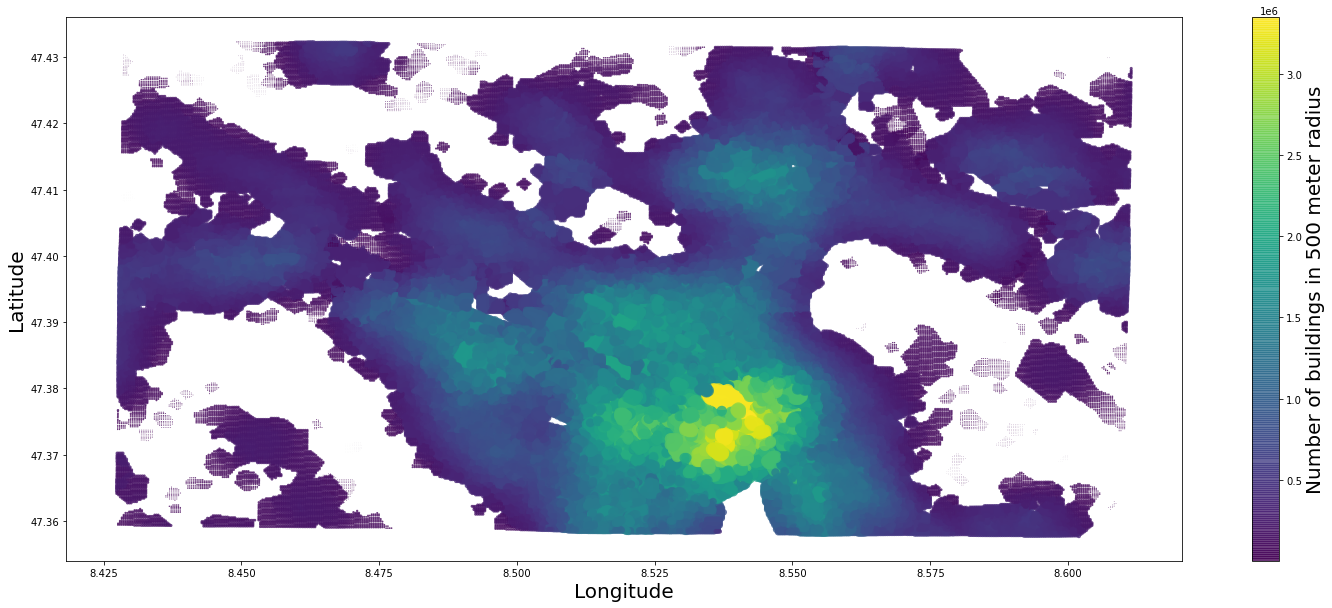

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im3 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=0.00005*ds_udl['bldg_500'], c=ds_udl['bldg_500'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im3, ax=ax)
cbar.set_label('Number of buildings in 500 meter radius', size=20)

- <font size="5">**Spatial distribution of public transport quality**</font>

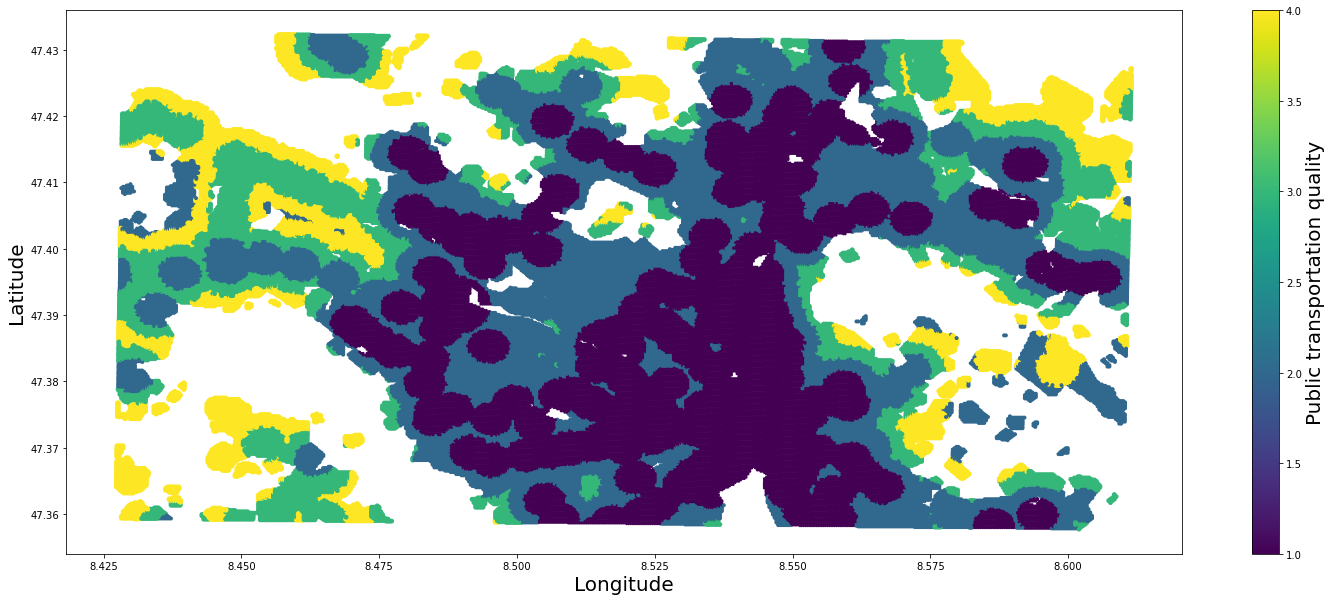

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im4 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=1, edgecolors='none', s=8*ds_udl['pt_class'], c=ds_udl['pt_class'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im4, ax=ax)
cbar.set_label('Public transportation quality', size=20)

> <font size="4">The plot shows that the quality of the public transportation in Zürich varies from "Good" to "Very good" in most part of the city. The same information can be found in the portal of the Federal Office for Spatial Development
https://map.geo.admin.ch/?topic=are&lang=de&bgLayer=ch.swisstopo.pixelkarte-grau&catalogNodes=954,959,965&E=2681180.00&N=1249300.00&zoom=5&layers=ch.are.gueteklassen_oev&layers_opacity=0.75</font>

- <font size="5">**Distance to next stop**</font>

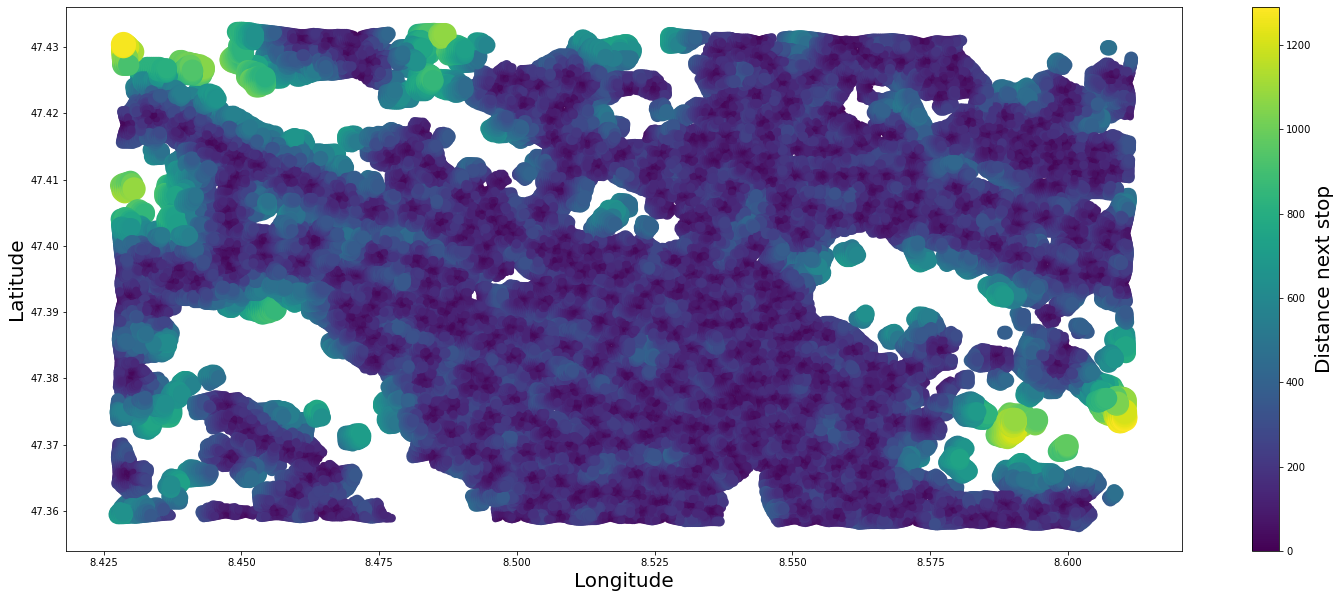

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im5 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=1, edgecolors='none', s=0.5*ds_udl['pt_dis'], c=ds_udl['pt_dis'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im5, ax=ax)
cbar.set_label('Distance next stop', size=20)

> <font size="4">The plot shows that the distribution of stops is mainly homogeneous and it covers basically the whole area of the city.  Important:  this plot doesn't take into account the type of stop.</font>

- <font size="5">**Catchment area**</font>

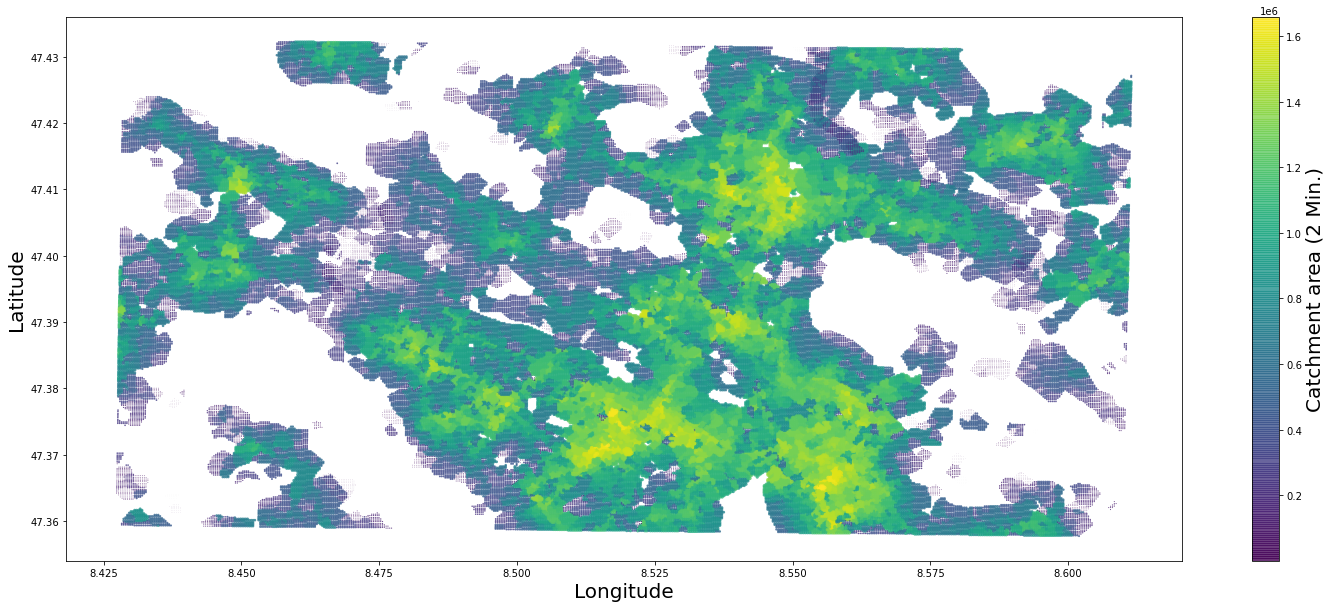

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im6 = ax.scatter(ds_udl_clean['lng'], ds_udl_clean['lat'], alpha=0.8, edgecolors='none', s=0.00001*ds_udl_clean['net_acc'], c=ds_udl_clean['net_acc'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im6, ax=ax)
cbar.set_label('Catchment area (2 Min.)', size=20)

- <font size="5">**Visualization of UDL dataset features and the locations of Migros and Coop supermarkets**</font>

In [123]:
ds_migros = pd.read_csv('../data/notebooksdetailed_Migros_python_mined.csv', header = None)
ds_coop = pd.read_csv('../data/notebooksdetailed_Coop_python_mined.csv', header = None)
ds_migros.head()

0                                              1  \
0            Migros Supermarkt                  Zrcherstrasse 15, Birmensdorf   
1              Denner Discount  Areal Sternen, Zrcherstrasse 110, Birmensdorf   
2            Migros Supermarkt         BRUNAUPARK, Giesshbelstrasse 65, Zrich   
3             Migros Take Away                     Giesshbelstrasse 65, Zrich   
4  migrolino Zrich Waffenplatz                   Waffenplatzstrasse 40, Zrich   

           2         3                                                  4  \
0  47.354330  8.436892  ['grocery_or_supermarket', 'supermarket', 'foo...   
1  47.359685  8.454051  ['supermarket', 'grocery_or_supermarket', 'foo...   
2  47.358386  8.517647  ['grocery_or_supermarket', 'supermarket', 'foo...   
3  47.358215  8.517397  ['meal_takeaway', 'bakery', 'restaurant', 'foo...   
4  47.359510  8.526613  ['supermarket', 'grocery_or_supermarket', 'foo...   

                             5     6  \
0  ChIJI8HnhsoOkEcRtrizPct-sG0  8903   
1  ChIJF0thjUUJkEcRI7K0JlSg1K8  8903   
2  ChIJj0lFi-0JkEcRhd1Rz4cxhXc  8045   
3  ChIJQ_-nj-0JkEcRsAWWiWpZMNA  8045   
4  ChIJm5NFmvoJkEcR09JW1-3sOxc  8002   

                                                   7  \
0    Zrcherstrasse 15, 8903 Birmensdorf, Switzerland   
1  Areal Sternen, Zrcherstrasse 110, 8903 Birmens...   
2  BRUNAUPARK, Giesshbelstrasse 65, 8045 Zrich, S...   
3       Giesshbelstrasse 65, 8045 Zrich, Switzerland   
4     Waffenplatzstrasse 40, 8002 Zrich, Switzerland   

                                                   8  
0  https://filialen.migros.ch/de/migros-supermark...  
1                             https://www.denner.ch/  
2  https://filialen.migros.ch/de/migros-supermark...  
3  https://filialen.migros.ch/de/take-away-zueric...  
4                           http://www.migrolino.ch/

1. **Supermarket location and houshold density**

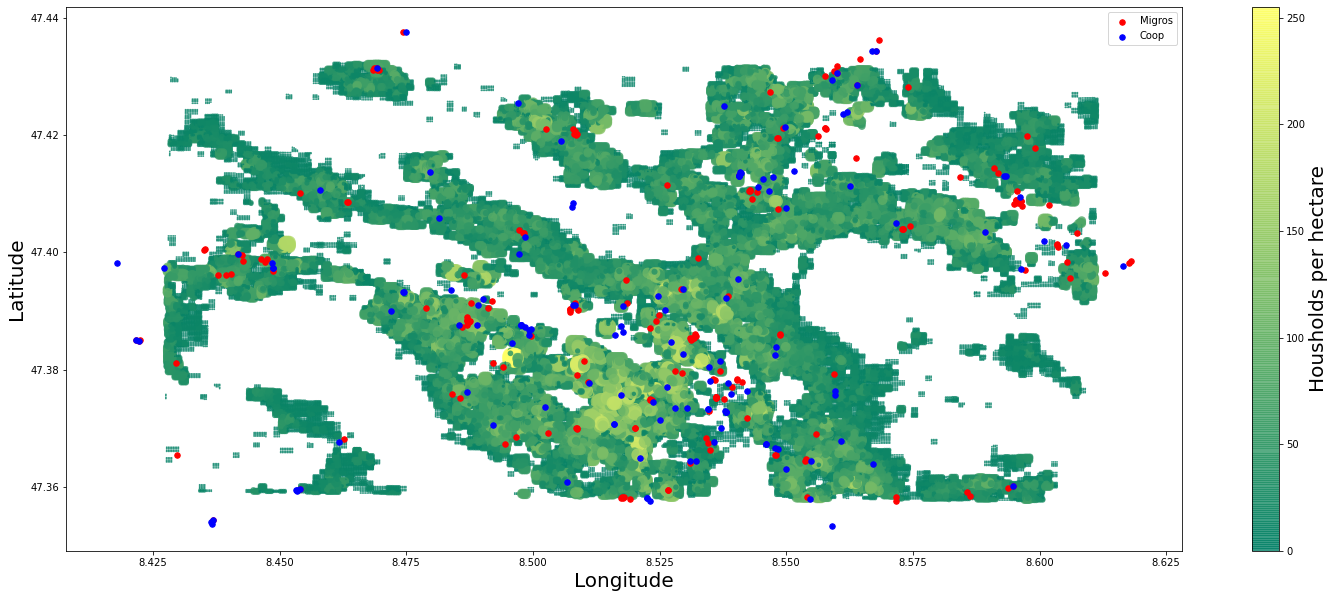

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im2 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=ds_udl['hh_ha'], c=ds_udl['hh_ha'], cmap='summer')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im2, ax=ax)
cbar.set_label('Housholds per hectare', size=20)
plt.scatter(ds_migros[3], ds_migros[2], s=30, c='red', label='Migros')
plt.scatter(ds_coop[3], ds_coop[2], s=30, c='blue', label='Coop')
plt.legend()

> <font size="4">The plot doesn't show a clear correlation between the location of the supermarkets and the houshold density.  While there are a lot of stores around areas with high houshold density there are stores as well in regions with low houshold density.</font>

2. **Supermarket location and public transportation quality**

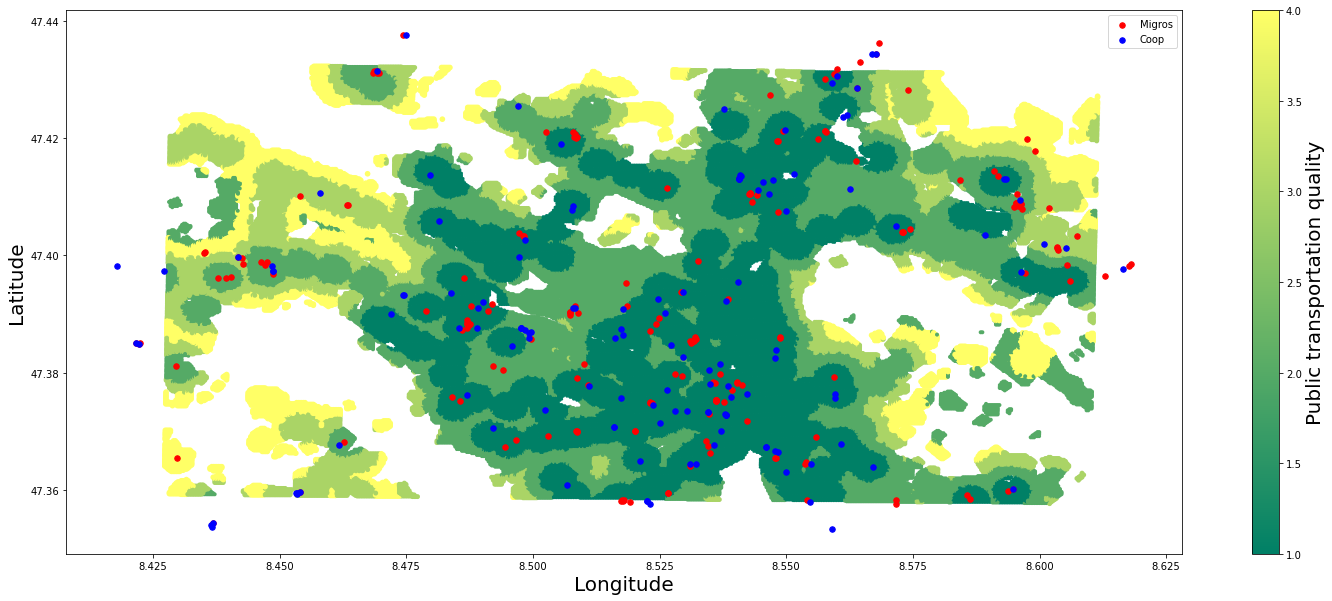

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im4 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=1, edgecolors='none', s=8*ds_udl['pt_class'], c=ds_udl['pt_class'], cmap='summer')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im4, ax=ax)
cbar.set_label('Public transportation quality', size=20)
plt.scatter(ds_migros[3], ds_migros[2], s=30, c='red', label='Migros')
plt.scatter(ds_coop[3], ds_coop[2], s=30, c='blue', label='Coop')
plt.legend()

> <font size="4">As can be seen from the plot, the locations of Coop and Migros supermarkets are concentrated basically on those regions with the best public transportation quality.  The quality index takes into consideration the distance to the nearest stop as well as well as its category (https://maps.zh.ch/system/docs/afv/KTZH_AFV_OeV_Gueteklassen_2_1_2020_08_25.pdf).  This index should be considered for predicting the revenue of possible future Migros stores.</font>

3. **Supermarket location and catchment area**

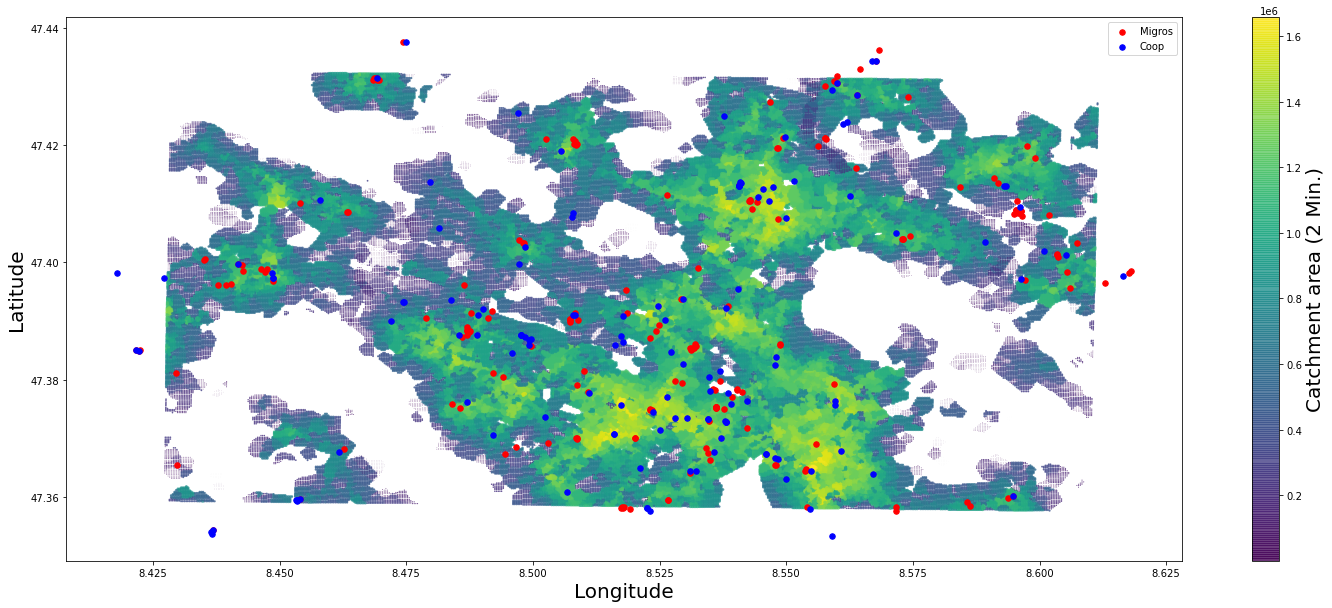

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im6 = ax.scatter(ds_udl_clean['lng'], ds_udl_clean['lat'], alpha=0.8, edgecolors='none', s=0.00001*ds_udl_clean['net_acc'], c=ds_udl_clean['net_acc'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
cbar = fig.colorbar(im6, ax=ax)
cbar.set_label('Catchment area (2 Min.)', size=20)
plt.scatter(ds_migros[3], ds_migros[2], s=30, c='red', label='Migros')
plt.scatter(ds_coop[3], ds_coop[2], s=30, c='blue', label='Coop')
plt.legend()

> <font size="4">The plot shows a correlation between big catchment areas and the location of supermarkets.  This implies that supermarkets are located around those regions with better infrastructure (i.e. public transportation) and services which in turn can attract a potential larger number of customers.  This can be also an important parameter to consider. </font>